![image](resources/qcqh-lab-header.png)

# Lab 1: Single-qubit and multi-qubit states, quantum teleportation

> Adapted by *Emmanuel Calvet*,

> From Lab 1 of [**Introduction to Quantum Computing and Quantum Hardware**](https://qiskit.org/learn/intro-qc-qh/).
---

In this lab, you will learn how to write `Qiskit` code and investigate single-qubit and multi-qubit states using the `bloch-sphere` and `qpshere` visualization.

If you have not used Jupyter notebooks before, take a look at the following video to quickly get started.
- https://www.youtube.com/watch?v=jZ952vChhuI

Remember, to run a cell in Jupyter notebooks, you press `Shift` + `Return/Enter` on your keyboard.
To add a cell, press `alt` + `Return/Enter`.

Before we begin, you will need to install some prerequisites into your environment. Run the cell below to complete these installations. At the end, the cell outputs will be cleared.

In [82]:
#!pip install -U -r resources/requirements.txt

from IPython.display import clear_output
clear_output()



  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


# Single-qubit states

In lecture, you learned that single qubit states can be written down generally as 

$$\sqrt{1-p}\vert0\rangle + e^{i\phi}\sqrt{p}\vert1\rangle$$

Here, $p$ is the probability that a measurement of the state in the computational basis $\{\vert0\rangle, \vert1\rangle\}$ will have the outcome $1$, and $\phi$ is the phase between the two computational basis states. 

Single-qubit gates can then be used to manipulate this quantum state by changing either $p$, $\phi$, or both.


Let's begin by creating a single-qubit quantum circuit. We can do this in `Qiskit` using the following:

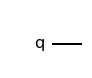

In [83]:
from qiskit import QuantumCircuit
import warnings
warnings.filterwarnings('ignore')

mycircuit = QuantumCircuit(1)
mycircuit.draw('mpl')

The above quantum circuit does not contain any gates. Therefore, if you start in any state, say $\vert0\rangle$, applying this circuit to your state doesn't change the state. 

To see this clearly, let's create the statevector $\vert0\rangle$. In `Qiskit`, you can do this using the following:

In [69]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0')

You can see what's contained in the object `sv`:

In [70]:
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


The vector itself can be found by writing

A qubit is a vector two-dimensional complex vector :

$$\vert0\rangle = \begin{bmatrix} 1 \\0 \end{bmatrix} $$

We can now apply the quantum circuit `mycircuit` to this state by using the following:

In [71]:
new_sv = sv.evolve(mycircuit)

Once again, you can look at the new statevector by writing

In [72]:
new_sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


A way to represent the state of one qubit is the `bloch sphere`.

This map the vector state $|\psi\rangle=\alpha|0\rangle+e^{i\phi}\beta|1\rangle$ with $\alpha, \beta \in \mathbb{R}$

Since we have the normalization condition imposing $\sqrt{\alpha^2+\beta^2}=1$,

By applying thetrigonometry formula $\sqrt{cos(x)^2+sin(x)^2}=1$

We derive that $|\psi\rangle=cos(\theta/2)|0\rangle+e^{i\phi}sin(\theta/2)|1\rangle$


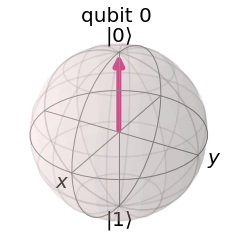

In [73]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

plot_bloch_multivector(new_sv.data)

Applying an $X$ gate flips the qubit from the state $\vert0\rangle$ to the state $\vert1\rangle$. To see this clearly, we will first create a single-qubit quantum circuit with the $X$ gate.

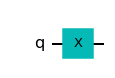

In [74]:
mycircuit = QuantumCircuit(1)
mycircuit.x(0)

mycircuit.draw('mpl')

Now, we can apply this circuit onto our state by writing

In [75]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(mycircuit)
new_sv

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


As you can see, the statevector now corresponds to that of the state $\vert1\rangle$. Recall that

$$\vert1\rangle = \begin{bmatrix}0\\1\end{bmatrix}$$

This is not surprising. Recall from the lecture that the states $\vert0\rangle$ and $\vert1\rangle$ are orthogonal. Therefore, $\langle0\vert1\rangle = 0$. The state can be shown on the `qsphere` by writing

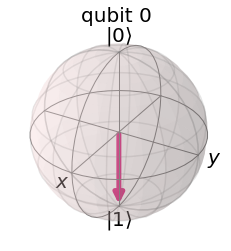

In [76]:
plot_bloch_multivector(new_sv.data)

These previous state are no different from classical bit

Now we will create the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$$
by applying a Hadamard gate.

 Here is how we can create the state and visualize it in `Qiskit`:

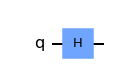

In [77]:
sv = Statevector.from_label('0')
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.draw('mpl')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


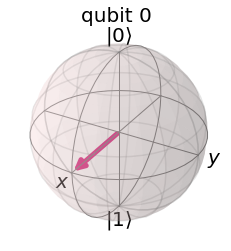

In [78]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_bloch_multivector(new_sv.data)

As you can see above, the state is now a superposition of both basis vector $\vert0\rangle$ and $\vert1\rangle$. 

The `Hadamard` gate rotated the vector state the **y** axis, of an angle $\frac{\pi}{2}$.

We can also create other superpositions with different phases. 

Let's create $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ which can be done by applying the Hadamard gate on the state $\vert1\rangle$.

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


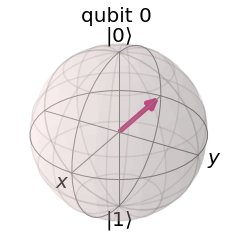

In [79]:
sv = Statevector.from_label('1')
mycircuit = QuantumCircuit(1)
mycircuit.h(0)

new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_bloch_multivector(new_sv.data)

This time, the vector was rotated to the phase of $\phi = \pi$. This is because the coefficient of $\vert1\rangle$ in the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ is $-1$, which is equal to $e^{i\pi}$.

Other phases can also be created by applying different gates. The $T$ and $S$ gates apply phases of $+\pi/4$ and $+\pi/2$, respectively. The widget below helps you see different gates, and their actions on single-qubit quantum states.

You can play around with the `block-sphere` : [https://javafxpert.github.io/grok-bloch/](https://javafxpert.github.io/grok-bloch/))
![](resources/Bloch-sphere.png)

# What happend when we run the circuit ?

In Quantum Computing you cannot directly get information from the qubits, first tou need to `measure` them, which will cause
a modification of their states !
- First, note that we use a second argument in the `QuantumCircuit(1,1)` command. The second argument says that we will be creating a quantum circuit that contains one qubits (the first argument), and one classical bits (the second argument).
- Second, note that the `measure` command takes two arguments. The first argument is the set of qubits that will be measured. The second is the set of classical bits onto which the outcomes from the measurements of the qubits will be stored.

*NB : Typically, in QC the basis along wich you measure is the **z** axis, you cannot measure a superposition, you always project 
the qubit state along a measurable basis state $|0\rangle$ or $|1\rangle$.*

Next, you will need to create a `backend` and give it to the `execute` function along with your circuit.
- We will use `Qiskit`'s built-in `Aer` simulators to run the circuit. To get the measurement counts, we can use the following code:

{'1': 494, '0': 506}


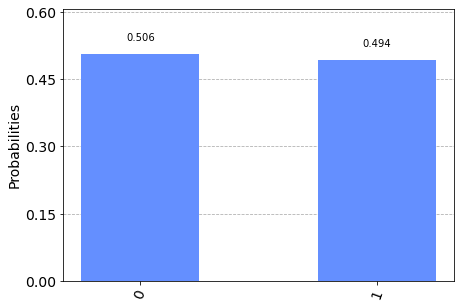

In [80]:
from qiskit import Aer, execute
from qiskit.visualization import  plot_histogram

# Create the circuit
mycircuit = QuantumCircuit(1, 1)
mycircuit.h(0)
mycircuit.measure(0, 0)

# Call a simulator backend
backend_sim = Aer.get_backend('qasm_simulator')
job = execute(mycircuit, backend_sim, shots=1000)

print(job.result().get_counts())
plot_histogram(job.result().get_counts())

## Measuse / projection

<mark>Born Rule</mark> : the probability that a state $|\psi\rangle$ collpases during a projective measurement onto the state $|x\rangle\in \left\{|0\rangle, |1\rangle \right\}$  is given by :
$$P(x) = {\left| \langle x|\psi\rangle\right|}^2; with \sum_i{P(x_i)=1}$$

With the previous example, the state of the qubit is $|\psi\rangle= \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$

Let's measure the probability of getting the the qubit in the state $|0\rangle$ :
$${\left| \langle 0|\psi\rangle\right|}^2=\frac{1}{2} {\left| \langle 0|(|0\rangle + |1\rangle)\right|}^2$$
$$=\frac{1}{2} {\left| \langle 0|0\rangle + \cancel{\langle 0|1\rangle})\right|}^2$$
$$=\frac{1}{2} {\left| 1\right|}^2=\frac{1}{2}$$


# Multi-qubit states

Similar to the discussion above, you can also explore multi-qubit gates in `Qiskit`. 

In lecture, you learned about Bell states, and how they can be generated using quantum gates. We will demonstrate below how to create the Bell state $$\frac{1}{\sqrt{2}}\left(\vert00\rangle + \vert11\rangle\right)$$ from the state $\vert00\rangle$. We'll start by visualizing the state $\vert00\rangle$ using the same procedure:

In [81]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('00')
plot_state_qsphere(sv.data)

NameError: name 'plot_state_qsphere' is not defined

Next, we use the Hadamard gate described above, along with a controlled-X gate, to create the Bell state.

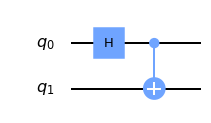

In [ ]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

The result of this quantum circuit on the state $\vert00\rangle$ is found by writing

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


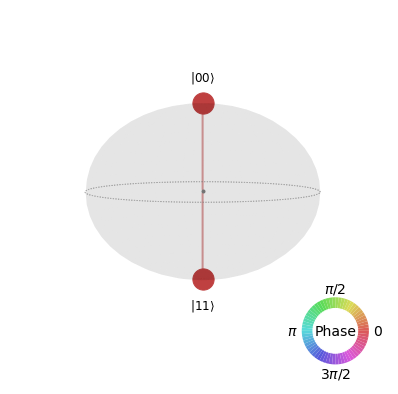

In [ ]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

## Measurements

Here is an example that creates the same Bell state and applies a measurement.

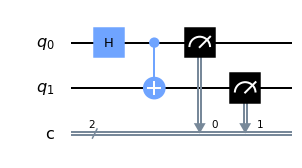

In [ ]:
mycircuit = QuantumCircuit(2, 2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.measure([0,1], [0,1])
mycircuit.draw('mpl')

In this example we used a CNOT gate, here is the logic table :

|input|output|
|---|--------|
|x y| x x $\oplus$ y|
|0 0| 0  0 |
|0 1| 0  1 |
|1 0| 1  1 |
|1 1| 1  0 |

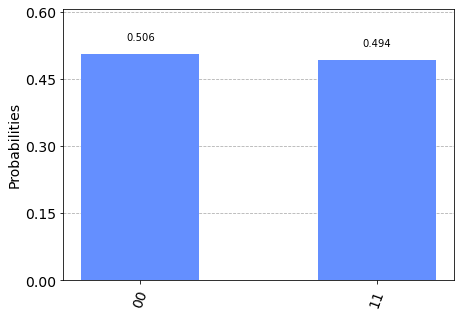

In [ ]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, simulator, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)

# Parametrized circuit on a real quantum computer

In this example we will take the same circuit and add a `parameter`, then `execute` it with many values in a real quantum circuit.

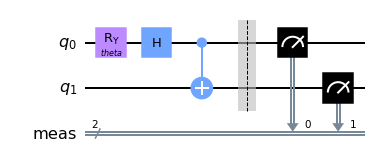

In [ ]:
from qiskit.circuit import Parameter

theta = Parameter('theta') # Create a Parameter object 
qc = QuantumCircuit(2)
qc.ry(theta, 0) # Gates can be parametrized this way
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw('mpl')

Now we create a list of circuit with all different initialization of the parameter


In [ ]:
import numpy as np

parameter_binds = {theta : 2*np.pi/3} # Dictionary 
qc_a = qc.assign_parameters(parameter_binds) # A quantum circuit with given parameter
 
thetas = np.linspace(0, 2*np.pi, 11)
qcs = list() 
for t in thetas: # You can create a list a circuit with various parameter values
    qcs.append(qc.assign_parameters({theta : t})) 

## Several things to note :
1. We can create a list, and put circuits inside it, with various initialization of parameters
2. ```assign_parameters``` is a method of QuantumCircuit object, that allow you to give a value for parameters.
    - The arguments of this method is a ```dict```, of the parameter as a *key*, and given value as *value*.

# Connect to IBMQ

You need to log in you IBM account at the adress : [https://quantum-computing.ibm.com/](https://quantum-computing.ibm.com/)

Then in the first page, get your **API token**.

If you have trouble to connect, check to the qiskit [documentation](https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq).

In [ ]:
from qiskit import IBMQ

Token = "YOUR_TOKEN" # Replace with your token
#IBMQ.save_account(token) # Uncoment the first time !
provider = IBMQ.load_account()

Now we will load a backend with a real quantum computer !

Then we will load so usefull information about this circuit.

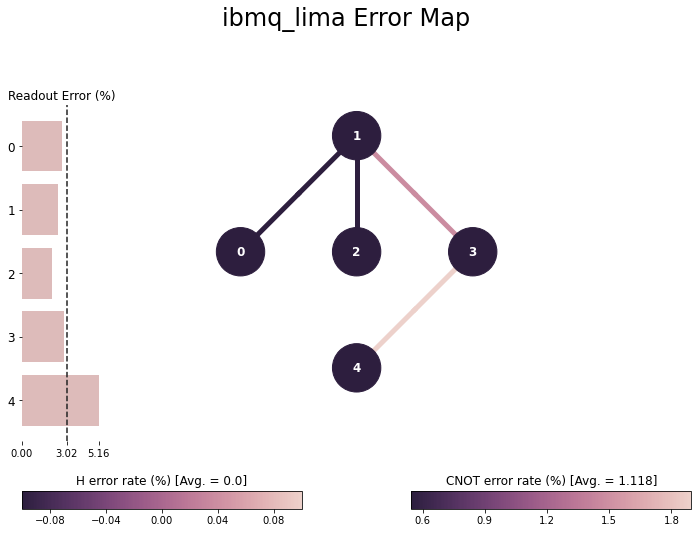

In [ ]:
from qiskit.visualization import plot_gate_map, plot_error_map

backend = provider.get_backend('ibmq_lima')
plot_error_map(backend)

Here you can check many intersting informations :
1. The (%) of readout error of each qubit : You can select the qubit you want to use to minimize the error.
2. The (%) of error of the `H` and `CNOT` gate : Using too much gates can lead to high errors.
3. The architecture of the circuit : If you need to connect qubits that are not connected in the graph, you have to use `SWAP` gates. They are composed of three alternating `CNOT`, thus they induce even more errors !

In [ ]:
from qiskit.tools.monitor import job_monitor

job = execute(qcs, backend, shots=1024, initial_layout=[0, 1]) # Add the two qubit you probably should use from indexes [0, 1, 2, 3 4]
job_monitor(job) # Gives status of the job

Job Status: job has successfully run


If you gave a list of several circuits to be executed, then you have to give the circuit as an argument of `get_counts` to get the result of the circuit you want !

In [ ]:
import matplotlib.pyplot as plt

circ = 1 # Select the circuit you want to display
plot = plot_histogram(job.result().get_counts(qcs[circ]))

# Additional reading

- You can watch a video on building the quantum teleportation quantum circuit here: https://www.youtube.com/watch?v=mMwovHK2NrE&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=6&t=0s

- For additional details about the quantum teleportation algorithm, including the principle of deferred measurement, you can refer to the Qiskit Textbook's section on the algorithm here: https://qiskit.org/textbook/ch-algorithms/teleportation.html

- The `1 minute Qiskit` episode entitled `What is the qsphere?` succinctly describes the Qsphere visualization tool that we used in this lab. You can find it here: https://youtu.be/4SoK2h4a7us